__발표자 : 정재윤 / 정지원 날짜 : 2016-11-01(화)__

# Chp4. Building Good Training Sets - Data Preprocessing

데이터의 질이나 유용한 정보의 양은 머신러닝 알고리즘이 잘 학습될 수 있게 결정하는 주요한 요인을 가지고 있다. 그러므로 데이터를 Learning 알고리즘에 넣기 전에 데이터셋을 전처리하는 과정은 매우 중요하다. 이번 챕터에서는 머신러닝 모델을 만들 때 도움을 주는 중요한 전처리 기술들에 대해 배워본다.

    • Removing and imputing missing values from the dataset

    • Getting categorical data into shape for machine learning algorithms

    • Selecting relevant features for the model construction

## Dealing with missing data

실생활에서 여러가지 이유로 하나 혹은 그 이상의 샘플들이 빠져있는 경우는 전혀 이상하지 않다. 데이터를 모으는 과정에서, 서베이에서 빈 칸으로 비워뒀거나 뭐 그런 경우가 있을 것이다. 비어있는 것 혹은 NaN와 같이 표시된 것을 _missing value_로 볼 것이다.

불행히도 컴퓨터 연산은 이러한 missing value를 계산해주지 못하며, 이것들을 무시하고 진행했을 때 예상치 못한 결과를 가져온다. 그러므로 missing values를 분석하기 전에 반드시 해결해야 한다. 결측값을 다루는 몇 가지 기술을 얘기하기 전에, CSV file을 불러와서 예시로 DataFrame을 살펴보자.

In [1]:
import pandas as pd
>>> from io import StringIO
>>> csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
0.0,11.0,12.0,'''
# If you are using Python 2.7, you need
# to convert the string to unicode:
# csv_data = unicode(csv_data)
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,0.0,11.0,12.0,NaN


__pandas__의 _rea_csv_ 함수를 이용하여 DataFrame 구조를 불러왔다. StringIO는 string을 read_csv가 읽을 수 있는 csv형식으로 만들어준다. 또한 데이터를 하드디스크에서 불러올 수도 있다.

In [2]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

scikit-learn이 비록 NumPy arrays와 동작하게 개발되긴 했지만, 때로는 __pandas__의 DataFrame을 이용하여 전처리하는 것이 편하다. DataFrame에서 .values 를 통해 numpy의 array형태로 변환해줄수 있다.

In [3]:
print(df.values)
print(type(df),"/",type(df.values))

[[  1.   2.   3.   4.]
 [  5.   6.  nan   8.]
 [  0.  11.  12.  nan]]
<class 'pandas.core.frame.DataFrame'> / <class 'numpy.ndarray'>


## Eliminating samples or features with missing values

결측값을 다루는 가장 쉬운 방법은 그 feature를 제거하거나, 혹은 sample을 제거하는 것이다. 다음과 같다.

In [4]:
df.dropna()

,A,B,C,D
0,1.0,2.0,3.0,4.0


유사하게, feature를 제거하는 방법은 다음과 같다.

In [5]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,0.0,11.0


_dropna_는 몇 가지 파라미터를 추가하여 다음과 같이 사용 가능하다.

In [6]:
# only drop rows where all columns are NaN
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,0.0,11.0,12.0,NaN


In [20]:
# drop rows that have not at least 4 non-NaN values
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [7]:
# only drop rows where NaN appear in specific columns (here: 'C')
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,0.0,11.0,12.0,NaN


결측치의 제거는 편리한 접근방법이지만 몇몇 단점이 있다. Samples을 제거하는 경우에는 분석이 불가능해질 정도로 너무 많은 데이터가 제거될 수도 있다. 혹은 features를 제거하는 경우에는 우리 Classifier가 클래스 내에서 분류해야 하는 중요한 정보를 제거할 리스크를 안게된다. 다음 섹션에서는, 결측값을 단순히 지우는 것이 아닌 다른 대안에 대해 배운다.

## Imputing missing values

종종, samples을 지우거나 feature를 제거하는 것은 실현이 불가능할 때도 있다. 데이터에 많은 정보가 손실되기 때문이다. 이런 경우, 다른 보간법을 이용하여 결측값을 다른 training samples로부터 추정할 수 있다. 가장 대표적인 방법은 __mean imputation__이다. 결측값을 단순히 features 전체 칼럼의 평균으로 채우는 것이다. 이 간편한 방법은 scikit-learn의 _Imputer_ 클래스에서 사용할 수 있다.

In [8]:
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
imr = imr.fit(df)
imputed_data = imr.transform(df.values)
imputed_data

array([[  1. ,   2. ,   3. ,   4. ],
       [  5. ,   6. ,   7.5,   8. ],
       [  0. ,  11. ,  12. ,   6. ]])

결측값(_NaN_)을 각각의 feature의 평균으로 대체하였다. axis=0을 axis=1로 바꾸면, 행의 mean으로 대체할 수 있다. 또한 strategy는 _median_이나 범주형 변수에 적합한  *most_frequent*로 사용할 수도 있다.

## Understanding the scikit-learn estimator API

이전 섹션에서, _Imputer_를 사용하였다. _Imputer_ 클래스는 데이터의 변환에 사용되는 **transformer** class에 속한다. 두 가지 중요한 추정의 방법으로는 _fit_과 _transform_이 있다. _fit_은 training data로부터 파라미터를 학습시키는 것이며, _transform_은 그러한 파라미터를 사용하여 데이터를 변환시키는 것이다. 이전에 모델을 fit해뒀다면, 어떤 데이터든간에 같은 features를 가진다면 변환이 가능하다. 다음은 training data로부터 _fit_된 모델을 통해 training data와 test data를 _transform_하는 과정이다.

![Image](figures/1.png)

Chpater 3에서 사용하였던 Classifier는 개념적으로 매우 유사한 transformer class API와 함께 scikit-learn 안의 esimator라 불리는 것에 속한다. Estimator는 _predict_와 _transform_ 메소드를 가지고 있다. 분류를 위한 estimator를 train 시킬 때, _fit_ 메소드를 이용하여 모델의 파라미터를 학습시킬 수 있다. 그러나 지도학습 과정에서는, 추가적으로 모델을 fitting 할 때, class label을 넣어줘야 한다. 과정을 보면 다음 그림과 같다.

![Image](figures/2.png)

## Handling categorical data

지금까지 Numerical values를 다루는 방법에 대해서만 배웠다. 실제 데이터들은 categorical feature를 많이 포함한다. __nominal__과 __ordinal__ feature의 차이에 대해 알아야한다. __Ordinal__ feature는 범주형 변수이면서 순서가 있고 정렬이 가능하다. 예를 들어, T-shirt size는 M, L, XL등이 있는데 XL>L>M로 순서를 매길 수 있다. 반대로, __nominal__ feature의 경우 순서가 없다. T-shirt color를 예로 들 수 있는데, green, blue, red 등 색의 경우 순서를 매길 수도 없고 우열을 가릴 수 없다.

범주형 변수를 다룰 때 사용하는 테크닉을 살펴보자. 새로운 DataFrame을 만들어 살펴본다.

In [9]:
import pandas as pd
df = pd.DataFrame([
['green', 'M', 10.1, 'class1'],
['red', 'L', 13.5, 'class2'],
['blue', 'XL', 15.3, 'class1']])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


## Mapping ordinal features

__Ordinal__ feature를 정수형으로 변환시켜보자. 불행히도 자동으로 처리해주는 편리한 함수는 없다. _size_ feature를 예시로 보자. 간단한 예시로, [ XL = L + 1 = M + 2 ] 로 정의할 수 있다.

In [10]:
size_mapping = {'XL':3, 'L':2, "M":1}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [11]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}
inv_size_mapping

{1: 'M', 2: 'L', 3: 'XL'}

## Encoding class labels

많은 머신러닝 라이브러리는 integer value로 인코딩 된 label을 요구한다. 비록 대다수의 scikit-learn의 분류를 위한 estimator들은 내부에서 label을 정수로 변환 해주지만, 작은 문제를 피하기 위해서는 직접 변환하는 방법이 더 좋을 것이다. class label을 인코딩 하기 위해서, mapping과 유사한 방법을 사용할 것이다. class label은 _ordinal_이 아니며, 특정 문자로된 래이블에 어떤 숫자를 매기는지는 중요하지 않다. 그러므로 0부터 시작해서 열거해보도록 하자.

In [12]:
import numpy as np
class_mapping = {label:idx for idx,label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [13]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


아까와 마찬가지로, 되돌릴 수 있다.

In [14]:
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


_LabelEncoder_ 클래스를 사용하여 바로 변환할 수 있다.

In [15]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([0, 1, 0], dtype=int64)

In [16]:
class_le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

## Performing one-hot encoding on nominal features

이전 섹션에서, 간단한 사전형 맵핑 접근을 통해 ordinal size feature를 integer로 변환하였다. scikit-learn의 estimator들은 class label을 아무 순서없이 보기 때문에, _LabelEncoder_ 클래스를 이용하여 string label을 integer로 변환하였다. 이것은 우리가 다음과 같이 _nominal_변수인 color를 변환하는 것과 유사해보인다.

In [17]:
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

blue -> 0 , green -> 1 , red -> 2 로 변한 것을 볼 수 있다.

문제가 뭘까? color는 특정한 순서가 없지만, learning 알고리즘은 green을 blue보다 큰 것으로 가정하며, red가 green보다 크다고 보게된다. 비록 이 가정이 틀렸지만, 알고리즘은 유용한 결과를 얻을 수 있었고, 이 결과는 최적이 아니다.

이 문제의 일반적인 해결 방법은 __one-hot encoding__이라 불리는 테크닉이다. 각각의 nominal feature에 속하는 각각의 unique value에 새로운 __dummy feature__를 추가한다. 예를 들어, color는 새로운 feature인 _blue,green,red_로 나눠진다. 각각은 0/1의 값을 가지며, blue의 경우 blue=1,green=0,red=0 을 갖게 된다. 과정은 다음과 같다.

In [18]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()

array([[  0. ,   1. ,   0. ,   1. ,  10.1],
       [  0. ,   0. ,   1. ,   2. ,  13.5],
       [  1. ,   0. ,   0. ,   3. ,  15.3]])

In [19]:
pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


## Partitioning a dataset in training and test sets

Test set은 궁극적으로 모델이 현실 데이터에 대해 어떤지 알아보기 위해 쓰인다. 이번 섹션에서는, __Wine dataset__을 통해 dataset을 전처리한 후에 데이터셋의 차원을 줄이기 위해 feature selection하는 방법에 대해 알아본다.

In [20]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Class label이 의미 하는 것은, 각각 다른 지역에서 자라난 포도의 종류를 의미한다.

_test_와 _training_ 데이터 셋을 랜덤하게 나누는 간단한 방법은 scikit-learn의 submodule인 cross_validation의 *train_test_split* 함수를 이용하는 것이다.

In [21]:
from sklearn.cross_validation import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

우선 13개의 feature 칼럼들을 변수 X로 놓고, 첫 번째 칼럼인 class label을 변수 y로 놓는다. 그리고서, _train_test_split_ 함수를 이용하여 랜덤하게 X와 y를 training과 test에 나누게 된다.

![Image](figures/3.PNG)

## Bringing features onto the same scale

__Feature scaling__은 전처리 과정에서 잊어버리기 쉬운 중요한 과정이다. 의사결정나무와 랜덤포레스트는 아주 소수의 머신 러닝 알고리즘 중 하나이며, feature scaling까지 고려하지 않았다. 그러나 머신러닝과 최적화 알고리즘의 과반수는 features가 동일한 스케일일 때, 더 좋은 성능을 보인다.

Feature scaling의 중요성은 간단한 예로 볼 수 있다. 1~10까지의 scale과 1~100,000의 scale을 생각해보자. 우리가 __Adaline__에서 squared error function을 고려할 때, 우리는 직관적으로 1~100,000의 스케일을 갖는 feature가 weight을 최적화하기 위해 더 많은 계산을 해야할 것이라고 생각할 수 있다. 다른 예로는, __KNN__에서 유클리디안 거리측정을 하는 경우를 생각할 수 있다. 샘플간의 거리는 두 번째 feature에만 영향을 받으며 구해질 것이다.

다른 스케일을 갖는 feature를 같은 스케일로 바꾸는 두 가지 기본적인 접근법이 있다.

__Normalization__ : [0, 1] 범위로 rescaling , min-max scaling 방식

![Image](figures/4.PNG)

In [22]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

Min-max scaling을 통한 normalization은 bounded interval한 값들이 필요할 때는 유용하게 사용되지만, standardization은 많은 머신러닝 알고리즘에 더 실용적이다. 로지스틱 회귀, SV 등과 같은 선형 모델들은 weight를 0이나 0과 비슷한 아주 작은 수로 초기값을 주어서 시작하기 때문이다. Standardization을 이용하면, feature가 평균 0, 분산 1인 표준정규분포를 따르게 할 수 있으며, weight를 학습시키기에 더 좋다. 또한 standardization은 아웃라이어에 대한 유용한 정보를 얻을 수 있고, value에 범위를 제한해줌으로써 알고리즘이 min-max scaling과 비교했을 때 아웃라이어에 덜 민감하게 만들 수 있다.

![Image](figures/5.PNG)
![Image](figures/6.PNG)

In [23]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

Again, it is also important to highlight that we fit the StandardScaler only once
on the training data and use those parameters to transform the test set or any new data point.

## Selecting meaningful features

만약 모델 생성 이후 테스트 데이터에서 좋은 성능을 내지 못한다면 이는 과적합(overfitting)일 가능성이 매우 높다. 과적합은 트레이닝 데이터셋의 특정 데이터들에 너무 모델이 치중한 것을 의미하며 real data에 제대로 적용되지 못한다. 이를 모델이 high variance를 가지고 있다고 표현하기도 한다. 이를 막기 위해서는 아래 네가지 방법이 있다.
![image](figures/j1.PNG)
더 많은 학습 데이터를 모으는 것은 종종 적합하지 않은 경우가 있다. 다음 챕터(chapter 5) 우리는 학습 데이터를 더 집어 넣는 것이 더 도움이 될지 되지 않을지 알 수 있는 방법에 대해 배울 것이다. 이제 다음 섹션에서 regularization 과 feature selection을 통한 dimensionality reduction으로 과적합을 줄이는 방법에 대해 배울 것이다. 

## Spare solutions with L1 regularization

![image](figures/j2.png)

L2 regularization과는 다르게 L1 regularization은 단순히 절댓값만 취해준다. L2와 대조적으로 더 희소한 feature vector를 산출한다. 이러한 희소성(Sparsity)는 우리가 큰 차원의 서로 irrelavant한 feature들로 이루어진 데이터를 가지고 있을 때 유용하게 쓰인다. 이러한 상황일 때 L1 regularization은 feature selection의 한 방법으로 사용된다. 

어떻게 L1이 sparsity를 유도하는지 보기 위하여 regularization의 기하학적 해석을 먼저 바라보자. w1과 w2의 convex cost function의 등고선을 그려보자. 여기서 우리는 챕터2에 나온 adaline에서 쓰인 SSE cost function을 선택할 것이다. 이는 이 cost function이 로지스틱 회귀 함수의 cost function보다 그리기 쉽고 대칭으로 이루어져 있기 때문이다. 학습 데이터의 cost function을 최소화하는 weight coefficients의 집합을 찾는 것이 목적이라는 것을 잊지 말고 아래 그래프를 보자.

![image](figures/j3.png)

regularization parameter를 통하여 regularization strength(정규화 강도)를 강화한다. 이를 통해 우리는 가중치를 0에 가깝게 만들 수 있고 모델의 학습 데이터에 대한 dependence를 감소시킬 수 있다. L2 penalty term에 관한 다음 그림을 보고 이 개념에 대해 좀 더 쉽게 이해해보자.

![image](figures/j4.png)

회색 영역이 L2 정규화 부분이다. weight coefficients의 조합은 회색 부분을 벗어날 수 없다. 반면에 우리는 여전히 cost function을 최소화하고 싶어한다. penalty constraint 아래에서, 최선의 선택은 unpenalized cost function의 등고선과 마주치는 부분을 선택하는 것이다. 정규화 파라미터가 큰 값일수록, penalized cost function은 빠르게 증가하며 이는 L2 영역을 작게 만든다. 예를 들어, 정규화 파라미터를 무한대로 크게 만들면, 가중치 변수들은 사실상 0에 가깝게 될 것이다.
 이 예시를 요약하면 다음과 같다. 우리의 목표는 unpenalized cost function + penalty term을 최소화 하는 것이다. 모델을 fit 시키기 위한 학습 데이터가 없을 때, 분산을 줄이기 위해서 bias를 더해주고 더 단순한 모델을 선택하는 것이라 할 수 있다.

이제 L1 정규화와 sparsity에 대해 이야기해보자. L1 정규화의 주 개념은 이제까지 우리가 이야기 한 것과 같다. 하지만 L1 penalty는 가중치 변수들의 절댓값의 합이므로 (L2는 제곱의 합) 다이아몬드 모양으로 표현할 수 있다. 

![image](figures/j5.png)

이 그림을 보면, cost function의 등고선이 w1이 0일 때 만난다. L1 정규화 시스템이 sharp하기 때문에 optimum(L1 diamond와 cost function의 등고선의 교집합)이 축 위에 있는 것으로 보인다. 이는 sparsity를 촉진한다고 볼 수 있다. 

In [24]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol',
                   'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids',
                   'Nonflavanoid phenols',
                   'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
print(df_wine.head())

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train_std, y_train)
print("Training accuracy : ", lr.score(X_train_std, y_train))
print("Test accuracy : ", lr.score(X_test_std, y_test))

Class labels [1 2 3]
   Class label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0            1    14.23        1.71  2.43               15.6        127   
1            1    13.20        1.78  2.14               11.2        100   
2            1    13.16        2.36  2.67               18.6        101   
3            1    14.37        1.95  2.50               16.8        113   
4            1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04           

트레이닝, 테스트 정확도가 둘 다 98%로 매우 높게 나온다. 이는 overfitting이 없다는 뜻이다. lr.intercept 함수를 쓰면 세 값이 나오는데 각 값들은 차례대로 class 1 vs others, class 2 vs others, class 3 vs others 에 해당하는 값들이다. lr.coef는 weight array를 알려준다. 각 행은 13개의 가중치로 이루어져 있으며 원 데이터의 각 변수들과 곱한값들의 합으로 net input을 구할 수 있다.
![image](figures/j6.png)
가중치 값들을 보면 대부분 non-zero entry가 별로 없다는 것을 알 수 있다. L1 정규화 결과, 우리는 이 데이터 셋에서 잠재적인 비연관성 변수들에 매우 robust한 모델을 만들었다. 

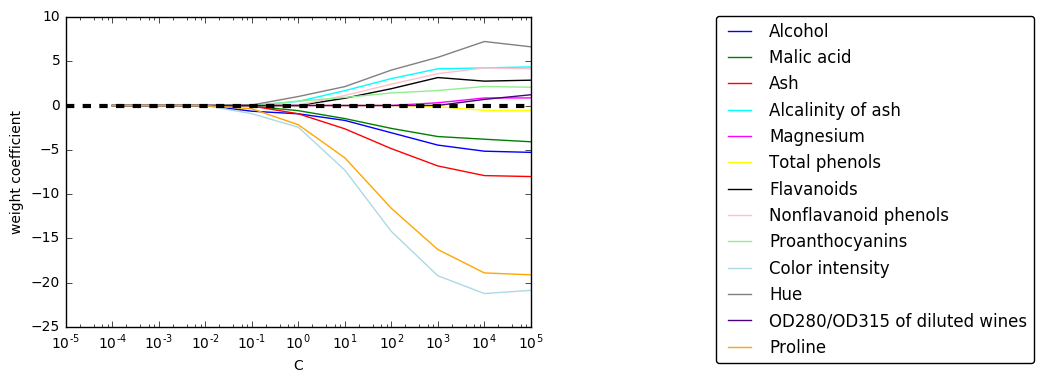

In [25]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan',
          'magenta', 'yellow', 'black',
          'pink', 'lightgreen', 'lightblue',
          'gray', 'indigo', 'orange']
weights, params = [], []
for c in np.arange(-4, 6):
    lr = LogisticRegression(penalty='l1', C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**-5, 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
ax.legend(loc="upper left",
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

플롯을 보면 L1 정규화에 대해 좀 더 자세히 알 수 있다. 우리가 보다시키, 정규화 파라미터를 강하게 주면(C < 0.1) 모든 feature들의 가중치가 0이 된다. C는 정규화 파라미터 람다의 inverse이다.

# Sequencial feature selection algorithms

모델의 복잡성을 줄이고 overfitting을 피하는 또 다른 방법으로는 feature selection을 통한 dimensionality reduction이 있다. 이는 비정규화된 모델에 매우 유용하다. 차원 축소에는 두 메인 카테고리가 있다 : feature selection & feature extraction. 이 단원에서는 feature selection에 관해 알아보고 다음 챕터에서 feature extraction에 대해 알아볼 것이다. 

sequential feature selection 알고리즘은 greedy search algorithm의 한 종류로 d-차원의 feature space를 k-차원의 feature subspace로 감소시킬 때 사용한다(k < d). feature selection 알고리즘의 발상은 두 가지에서 나왔다. 첫 번째는 문제에 가장 관련있는 feature들의 subset을 선택하여 계산적인 효율성을 높이는 것, 두 번째는 irrelevant한 feature이나 noise을 제거하여 모델의 generalization error를 ㅜㄹ이는 것이다. 이는 정규화를 지원하지 않는 알고리즘들에 매우 유용하다. 클래식한 sequencial feature selection 알고리즘은 sequencial backward selection(SBS)이 있는데 이는 최초 feature subspace의 차원을 줄여 최소한의 분류기법 성능 하락으로 계산 효율성을 높이는 것에 초점을 맞춘다. 어떠한 상황에서는 SBS가 과적합에 고통받는 모델의 예측 성능을 높이기도 한다.
![image](figures/j7.PNG)

SBS 알고리즘의 아이디어는 매우 간단하다. Full feature subset에서 새로운 feature subspace가 원하는 갯수의 feature를 가지고 있을 때까지 연속적으로 feature를 지운다. 어떤 feature를 각 단계에서 지울지 결정하기 위해서, 최소화를 위한 criterion function J를 정의해준다.
Criterion function에 의해 계산되는 이 기준은 분류 기법의 성능이 특정 변수를 제거하기 전과 후에 변하는 정도라고 할 수 있다. 이 criterion을 최대화 하는 feature가 단순히 제거될 feature로 지정되는 것이다. 제거 해봤을 때 최소한의 성능 하락이 나타나는 변수를 제거해준다. SBS의 앞선 정의에 기반하여, 우리는 이 알고리즘을 4개의 심플한 단계로 말할 수 있다.

![image](figures/j8.PNG)

아쉽게도 scikit-learn에는 SBS알고리즘이 없다. 하지만 원리가 간단하므로 한 번 해보자.

In [26]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

class SBS():
    
    def __init__(self, estimator, k_features, scoring=accuracy_score, test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
        
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = \
                train_test_split(X, y, test_size=self.test_size,
                    random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train,
                X_test, y_test, self.indices_)
        self.scores_ = [score]
        while dim > self.k_features:
            scores = []
            subsets = []
            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train,
                X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        return self
    
    def transform(self, X):
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train,
        X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

k_feature를 우리가 원하는 feature 갯수로 정의한다. 기본적으로 scikit-learn의 accuracy_score를 이용하여 feature subsets의 모델의 성능과 estimator of classification을 평가한다. fit method의 while loop에서, itertools.combination function으로 만들어진 feature subset들은 우리가 원하는 dimensionality를 가질 때까지 평가되고 점점 줄어든다. 각 iteration에서, 가장 좋은 subset이 X_test라는 내부적으로 만들어진 테스트 데이터 셋으로 평가되어 self.scores 리스트에 저장된다. 이 score들은 나중에 결과를 평가할 때 사용된다. 최종 변수 서브셋의 column 인덱스들은 sel.indices에 저장된다. 마지막에 best performing feature subset에 없는 변수들을 제거한다(?)
(Note that, instead of calculating the criterion explicitly inside the fit method, we simply removed the feature that is not contained in the best performing feature subset...? )

이제 scikit-learn의 KNN 분류기법을 활용하여 SBS를 적용해보자.

In [27]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
knn = KNeighborsClassifier(n_neighbors=2)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

SBS를 정의할 때 fit function 안에 dataset을 test와 training data로 나눠줌에도 불구하고, X_train을 그대로 알고리즘에 집어넣는다. 이는 오리지널 테스트 데이터가 트레이닝 데이터의 일부가 되는 것을 막기 위함이다.
SBS 알고리즘은 각 단계에서 best feature subset의 점수를 획득하는 것을 기억하자. 아래는 KNN 분류기법을 활용한 코드이다.

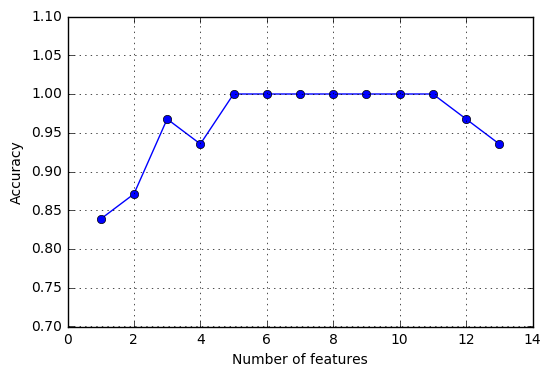

In [28]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

플롯에서 보듯이, KNN 분류기법의 정확도는 feature의 갯수를 줄일수록 더 높아진다. 이는 curse of dimensionality가 줄어들기 때문이다. k = 5,6,7,8,9,10일 때 100%의 정확도를 보여준다.

k = 5일 때 어떤 변수들이 선택됬는지 살펴보자.

In [29]:
k5 = list(sbs.subsets_[8])
print(df_wine.columns[1:][k5])

Index(['Alcohol', 'Malic acid', 'Alcalinity of ash', 'Hue', 'Proline'], dtype='object')


원래 데이터를 가지고 KNN 분류 기법의 성능을 평가해보자.

In [30]:
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

Training accuracy: 0.983870967742
Test accuracy: 0.944444444444


전체 feature를 사용했을 때의 결과는 위와 같다. 학습데이터에 대한 정확도는 98%지만 테스트 데이터에 대한 정확도는 94.4%로 약간 낮다. 이는 약간의 오버피팅을 의미한다. 이제 위에서 선택한 5개의 변수들만 가지고 KNN 분류기법을 평가 해보자.

In [31]:
knn.fit(X_train_std[:, k5], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k5], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k5], y_test))

Training accuracy: 0.959677419355
Test accuracy: 0.962962962963


와인 데이터 셋에 있는 5개의 feature들만 사용하여 최종적으로 테스트 데이터셋의 예측률을 2% 더 향상시킬 수 있다. 또한 트레이닝 데이터와 테스트 데이터 모델 정확도의 갭을 줄여 오버피팅을 조금 더 방지했다고 볼 수 있다.

## Assessing feature importance with random forests

이전 섹션에서, L1 정규화를 사용하여 로지스틱 회귀의 관련없는 feature를 찾아내는 방법과, SBS 알고리즘을 이용하여 feature를 선택하는 방법에 대해 배웠다. 연관있는 features를 찾아내는 다른 방법은 __random forest__이다. 랜덤 포레스트를 이용하면, forest의 모든 의사결정나무로부터 계산된 평균 불순도 감소를 통해 feature importance를 구할 수 있었다. 이 과정은 우리의 데이터가 선형분리이거나 아니라는 가정이 없어도 가능했다. 랜덤 포레스트는 _RandomForestClassifier_로 fit을 마치고서, *feature_importances* 라는 어트리뷰트를 통해서 우리에게 feature importance를 구할 수 있게 해준다. 아래 코드를 통해, Wine dataset의 10,000개의 나무를 train하고, 13개의 respective importance measure를 순위 매겨본다. 앞선 챕터에서 말했듯, standardization이나 normalization을 해줄 필요는 없다.

In [32]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[f], importances[indices[f]]))

 1) Alcohol                        0.182483
 2) Malic acid                     0.158610
 3) Ash                            0.150948
 4) Alcalinity of ash              0.131987
 5) Magnesium                      0.106589
 6) Total phenols                  0.078243
 7) Flavanoids                     0.060718
 8) Nonflavanoid phenols           0.032033
 9) Proanthocyanins                0.025400
10) Color intensity                0.022351
11) Hue                            0.022078
12) OD280/OD315 of diluted wines   0.014645
13) Proline                        0.013916


After executing the preceding code, we created a plot that ranks the different features in the Wine dataset by their relative importance; note that the feature importances are normalized so that they sum up to 1.0.

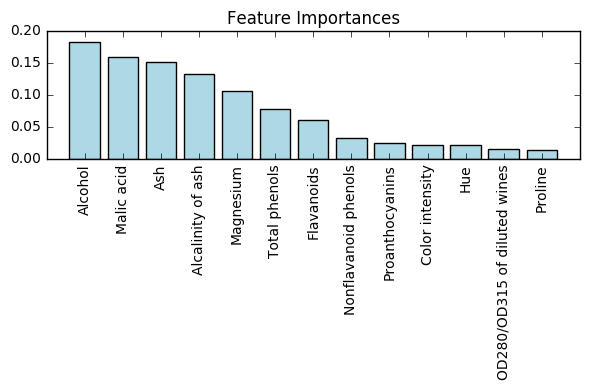

In [33]:
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
importances[indices],
color='lightblue',
align='center')
plt.xticks(range(X_train.shape[1]),
feat_labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

10,000개의 나무의 평균 불순도 감소를 통하여 가장 변별력있는 feature를 알아냈다. 흥미롭게도 3개의 상위 결과는 이전 섹션에서 했던 SBS알고리즘을 이용한 5개의 상위 결과에 속한다. 그러나 해석능력에 있어서는, random forest 기술이 가치있는 언급 해준다는 면에서 중요하다. 예를 들어, 2개 혹은 그 이상의 features가 매우 연관(correlated)있다면, 하나의 feature는 아마 매우 높은 순위에 들고 그 외의 feature(s)는 제대로 capture 되지 못할 것이다. 우리가 feature importance의 해석보다 모델의 예측 능력에 더 관심이 있다면, 이러한 문제는 신경쓸 필요가 없다.

우리가 RandomForestClassifier를 feature selector로서 사용하고자 원한다면 _transform_ 함수를 통하여 사용자가 모델 fitting 후에 threshold를 정하여 feature selection할 수 있다. 또한 이는 전처리 과정과 estimator을 연결해주는 pipeline 역할을 하기도 한다. 예시에서, threshold를 0.15로 잡아서 3개의 중요한 features인 Alcohol, Malic acid, Ash를 선택하는 과정은 다음과 같다.

In [34]:
X_selected = forest.transform(X_train, threshold=0.15)
X_selected.shape

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


(124, 3)

## Summary

결측값을 다루는 방법에 대해 배웠다. 머신러닝 알고리즘에 데이터를 집어넣기 전에, 범주형 변수를 알맞게 encode했으며, ordinal 혹은 nominal 변수를 정수형 표현으로 나타냈다.

L1 regularization은 모델의 복잡성을 줄임으로써 오버피팅을 방지하도록 돕는다. 연관없는 feature를 제거하기 위한 대안으로 __sequential feature selection algorithm__을 이용하여 데이터셋으로부터 의미있는 features를 골라냈다.

이 다음 챕터에서는, 차원의 축소에 대해 배운다. __feature extraction__은 feature를 버림으로써 남은 feature를 사용하는 것이 아니라, feature들을 더 낮은 차원의 subspace로 compress 하게 해준다.